# US Name

Estimate tfp_OP_f as a function of  asset_tangibility and others (Estimate table 6 with TFP) 

# Business needs 

Estimate tfp_OP_f as a function of  asset_tangibility, cash_over_total_asset, credit constraint, current ratio, sales over asset Andersen method, liabilities over asset (Estimate table 6 by using TFP instead of asset tangibility to explain a new channel of impact) 

## Description
### Objective 

Test the coefficient sign and significant of the main variable

### Tables

Table 1: Baseline Estimate, tfp_OP_f and asset_tangibility, cash_over_total_asset, credit constraint, current ratio, sales over asset Andersen method, liabilities over asset

**Cautious**
Make sure no empty rows, otherwise it will be filtered out in the estimate


# Metadata

- Key: rae81txps49928f
- Epic: Models
- US: Estimate TFP
- Task tag: #analytics, #andersen, #tfp, #econometrics
- Analytics reports: 

# Input Cloud Storage

## Table/file

**Name** 

- https://github.com/thomaspernet/Financial_dependency_pollution/blob/master/01_data_preprocessing/02_transform_tables/09_asif_tfp_firm_baseline.md

**Github**

- DATA/ECON/FIRM_SURVEY/ASIF_CHINA/TRANSFORMED/TFP/CREDIT_CONSTRAINT



# Connexion server

In [1]:
from awsPy.aws_authorization import aws_connector
from awsPy.aws_s3 import service_s3
from awsPy.aws_glue import service_glue
from pathlib import Path
import pandas as pd
import numpy as np
#import seaborn as sns
import os, shutil, json
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

path = os.getcwd()
parent_path = str(Path(path).parent.parent.parent)


name_credential = 'financial_dep_SO2_accessKeys.csv'
region = 'eu-west-2'
bucket = 'datalake-london'
path_cred = "{0}/creds/{1}".format(parent_path, name_credential)

In [2]:
con = aws_connector.aws_instantiate(credential = path_cred,
                                       region = region)
client= con.client_boto()
s3 = service_s3.connect_S3(client = client,
                      bucket = bucket, verbose = False)
glue = service_glue.connect_glue(client = client) 

In [3]:
pandas_setting = True
if pandas_setting:
    #cm = sns.light_palette("green", as_cmap=True)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_colwidth', None)

In [4]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'


In [35]:
change_target <- function(table){
    ## SOE
    check_target_current_ratio_soe <- grep("ownershipPRIVATE:log\\(current_ratio\\)", rownames(table$coef))
    check_target_liabilities_soe <- grep("ownershipPRIVATE:log\\(liabilities_tot_asset\\)", rownames(table$coef))
    ## foreign
    check_target_current_ratio_for <- grep("ownership_adjustedDOMESTIC:log\\(current_ratio\\)", rownames(table$coef))
    check_target_liabilities_for <- grep("ownership_adjustedDOMESTIC:log\\(liabilities_tot_asset\\)", rownames(table$coef))
    
    ## TCZ
    check_target_current_ratio_tcz <- grep("tcz:log\\(current_ratio\\)", rownames(table$coef))
    check_target_liabilities_tcz <- grep("tcz:log\\(liabilities_tot_asset\\)", rownames(table$coef))
    #check_target_cashflow_tcz <- grep("tcz:log\\(cashflow_to_tangible\\)", rownames(table$coef))
    
    ## SPZ
    check_target_current_ratio_spz <- grep("spz:log\\(current_ratio\\)", rownames(table$coef))
    check_target_liabilities_spz <- grep("spz:log\\(liabilities_tot_asset\\)", rownames(table$coef))
    #check_target_cashflow_spz <- grep("tcz:log\\(cashflow_to_tangible\\)", rownames(table$coef))
    
    if (length(check_target_current_ratio_soe) !=0) {
    ## SOE
    rownames(table$coefficients)[check_target_current_ratio_soe] <- 'log(current_ratio):ownershipPRIVATE'
    rownames(table$beta)[check_target_current_ratio_soe] <- 'log(current_ratio):ownershipPRIVATE'
    rownames(table$coefficients)[check_target_liabilities_soe] <- 'log(liabilities_tot_asset):ownershipPRIVATE'
    rownames(table$beta)[check_target_liabilities_soe] <- 'log(liabilities_tot_asset):ownershipPRIVATE'
    } else if (length(check_target_current_ratio_tcz) !=0){
    
    ## TCZ
    rownames(table$coefficients)[check_target_current_ratio_tcz] <- 'log(current_ratio):tcz'
    rownames(table$beta)[check_target_current_ratio_tcz] <- 'log(current_ratio):tcz'
    rownames(table$coefficients)[check_target_liabilities_tcz] <- 'log(liabilities_tot_asset):tcz'
    rownames(table$beta)[check_target_liabilities_tcz] <- 'log(liabilities_tot_asset):tcz'
    #rownames(table$coefficients)[check_target_cashflow_tcz] <- 'log(cashflow_to_tangible):tcz'
    #rownames(table$beta)[check_target_cashflow_tcz] <- 'log(cashflow_to_tangible):tcz'
        } else if (length(check_target_current_ratio_spz) !=0){
        
    ## SPZ
    rownames(table$coefficients)[check_target_current_ratio_spz] <- 'log(current_ratio):spz'
    rownames(table$beta)[check_target_current_ratio_spz] <- 'log(current_ratio):spz'
    rownames(table$coefficients)[check_target_liabilities_spz] <- 'log(liabilities_tot_asset):spz'
    rownames(table$beta)[check_target_liabilities_spz] <- 'log(liabilities_tot_asset):spz'
    #rownames(table$coefficients)[check_target_cashflow_spz] <- 'log(cashflow_to_tangible):tcz'
    #rownames(table$beta)[check_target_cashflow_spz] <- 'log(cashflow_to_tangible):tcz'
        }
    else if (length(check_target_current_ratio_for) !=0){
        
    ## for
    rownames(table$coefficients)[check_target_current_ratio_for] <- 'log(current_ratio):ownership_adjustedDOMESTIC'
    rownames(table$beta)[check_target_current_ratio_for] <- 'log(current_ratio):ownership_adjustedDOMESTIC'
    rownames(table$coefficients)[check_target_liabilities_for] <- 'log(liabilities_tot_asset):ownership_adjustedDOMESTIC'
    rownames(table$beta)[check_target_liabilities_for] <- 'log(liabilities_tot_asset):ownership_adjustedDOMESTIC'
    #rownames(table$coefficients)[check_target_cashflow_spz] <- 'log(cashflow_to_tangible):tcz'
    #rownames(table$beta)[check_target_cashflow_spz] <- 'log(cashflow_to_tangible):tcz'
        }
    return (table)
}

# Load tables

Since we load the data as a Pandas DataFrame, we want to pass the `dtypes`. We load the schema from Glue to guess the types

In [6]:
db = 'firms_survey'
table = 'asif_tfp_credit_constraint'

In [7]:
dtypes = {}
schema = (glue.get_table_information(database = db,
                           table = table)
          ['Table']['StorageDescriptor']['Columns']
         )
for key, value in enumerate(schema):
    if value['Type'] in ['varchar(12)']:
        format_ = 'string'
    elif value['Type'] in ['decimal(21,5)', 'double', 'bigint', 'int', 'float']:
        format_ = 'float'
    else:
        format_ = value['Type'] 
    dtypes.update(
        {value['Name']:format_}
    )

In [8]:
download_data = True
filename = 'df_{}'.format(table)
full_path_filename = 'SQL_OUTPUT_ATHENA/CSV/{}.csv'.format(filename)
path_local = os.path.join(str(Path(path).parent.parent.parent), 
                              "00_data_catalogue/temporary_local_data")
df_path = os.path.join(path_local, filename + '.csv')
if download_data:
    
    s3 = service_s3.connect_S3(client = client,
                          bucket = bucket, verbose = False)
    query = """
    SELECT * 
    FROM {}.{}
    WHERE 
    cashflow_to_tangible > 0
    AND current_ratio > 0
    AND liabilities_tot_asset > 0
    AND age > 0
    AND year in (
        '2001', '2002', '2003', '2004', '2005', 
        '2006', '2007'
      )
    -- AND ownership not in ('COLLECTIVE')  
    """.format(db, table)
    df = (s3.run_query(
        query=query,
        database=db,
        s3_output='SQL_OUTPUT_ATHENA',
        filename=filename,  # Add filename to print dataframe
        destination_key='SQL_OUTPUT_ATHENA/CSV',  #Use it temporarily
        dtype = dtypes
    )
          .assign(
              ownership = lambda x: np.where(x['ownership'].isin(['COLLECTIVE']), "SOE", x['ownership']),
          )
          .assign(
              ownership = lambda x: np.where(x['ownership'].isin(['HTM']), "FOREIGN", x['ownership']),
              ownership_adjusted = lambda x: np.where(x['ownership'].isin(['PRIVATE', 'SOE', 'COLLECTIVE']), 'DOMESTIC', 'FOREIGN'),
              fe_fo=lambda x: le.fit_transform(x["firm"].astype('str') + x['ownership'])
            )
        )
    #s3.download_file(
    #    key = full_path_filename
    #)
    #shutil.move(
    #    filename + '.csv',
    #    os.path.join(path_local, filename + '.csv')
    #)
    #s3.remove_file(full_path_filename)

In [9]:
df.to_csv(df_path, index = False)

In [10]:
df['ownership'].value_counts()

PRIVATE    223986
SOE        107796
FOREIGN     70587
Name: ownership, dtype: int64

In [11]:
df['ownership_adjusted'].value_counts()

DOMESTIC    331782
FOREIGN      70587
Name: ownership_adjusted, dtype: int64

In [12]:
df.isna().sum().loc[lambda x: x>0]

credit_constraint             30873
d_credit_constraint           30873
lag_current_ratio            233394
lag_liabilities_tot_asset    233394
lag_sales_tot_asset          233394
rd_tot_asset                 249681
lag_cashflow_to_tangible     233394
labor_capital                    82
dtype: int64

In [13]:
pd.DataFrame(schema)

,Name,Type,Comment
0,firm,string,
1,year,string,
2,cic,string,
3,indu_2,string,
4,short,string,
5,geocode4_corr,string,
6,province_en,string,
7,tcz,string,
8,spz,string,
9,ownership,string,


## Schema Latex table

To rename a variable, please use the following template:

```
{
    'old':'XX',
    'new':'XX_1'
    }
```

if you need to pass a latex format with `\`, you need to duplicate it for instance, `\text` becomes `\\text:

```
{
    'old':'working\_capital\_i',
    'new':'\\text{working capital}_i'
    }
```

Then add it to the key `to_rename`

In [ ]:
add_to_dic = True
if add_to_dic:
    if os.path.exists("schema_table.json"):
        os.remove("schema_table.json")
        data = {'to_rename':[], 'to_remove':[]}
    dic_rename =  [
        {
        'old':'periodTRUE',
        'new':'\\text{period}'
        },
        ### depd
        {
        'old':'total\_asset',
        'new':'\\text{total asset}'
        },
        {
        'old':'tangible',
        'new':'\\text{tangible asset}'
        },
        {
        'old':'investment\_tot\_asset',
        'new':'\\text{investment to asset}'
        },
        {
        'old':'rd\_tot\_asset',
        'new':'\\text{rd to asset}'
        },
        {
        'old':'asset\_tangibility\_tot\_asset',
        'new':'\\text{collateral}'
        },
        
        ### ind
        {
        'old':'current\_ratio',
        'new':'\\text{current ratio}'
        },
        {
        'old':'quick\_ratio',
        'new':'\\text{quick ratio}'
        },
        {
        'old':'liabilities\_tot\_asset',
        'new':'\\text{liabilities to asset}'
        },
        {
        'old':'sales\_tot\_asset',
        'new':'\\text{sales to asset}'
        },
        {
        'old':'cash\_tot\_asset',
        'new':'\\text{cash to asset}'
        },
        {
        'old':'cashflow\_tot\_asset',
        'new':'\\text{cashflow to asset}'
        },
        {
        'old':'cashflow\_to\_tangible',
        'new':'\\text{cashflow}'
        },
        {
        'old':'d\_credit\_constraintBELOW',
        'new':'\\text{Fin dep}_{i}'
        },
        ## control
        {
        'old':'age + 1',
        'new':'\\text{age}'
        },
        {
        'old':'export\_to\_sale',
        'new':'\\text{export to sale}'
        },
        {
        'old':'labor\_capital',
        'new':'\\text{labor to capital}'
        },
        ### Supply demand external finance
        {
        'old':'supply\_all\_credit',
        'new':'\\text{all credit}'
        },
        {
        'old':'supply\_long\_term\_credit',
        'new':'\\text{long term credit}'
        },
        {
        'old':'credit\_constraint',
        'new':'\\text{credit demand}'
        },
        {
        'old':'soe\_vs\_priPRIVATE',
        'new':'\\text{private}'
        },
    ]
    

    data['to_rename'].extend(dic_rename)
    with open('schema_table.json', 'w') as outfile:
        json.dump(data, outfile)

In [14]:
import sys
sys.path.append(os.path.join(parent_path, 'utils'))
import latex.latex_beautify as lb

In [15]:
options(warn=-1)
library(tidyverse)
library(lfe)
#library(lazyeval)
library('progress')
path = "../../../utils/latex/table_golatex.R"
source(path)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: Matrix

Attaching package: ‘Matrix’

The following object is masked from ‘package:tidyr’:

    expand


Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 



In [17]:
%get df_path
df_final <- read_csv(df_path) %>%
mutate_if(is.character, as.factor) %>%
    mutate_at(vars(starts_with("fe")), as.factor) %>%
mutate(
#    period = relevel(as.factor(period), ref='FALSE'),
    #soe_vs_pri = relevel(as.factor(soe_vs_pri), ref='SOE')
    ownership = relevel(as.factor(ownership), ref='SOE'),
    ownership_adjusted = relevel(as.factor(ownership_adjusted), ref='FOREIGN')
)
dim(df_final)

Parsed with column specification:
cols(
  .default = col_double(),
  short = col_character(),
  province_en = col_character(),
  ownership = col_character(),
  d_credit_constraint = col_character(),
  lag_current_ratio = col_logical(),
  lag_liabilities_tot_asset = col_logical(),
  lag_sales_tot_asset = col_logical(),
  rd_tot_asset = col_logical(),
  lag_cashflow_to_tangible = col_logical(),
  ownership_adjusted = col_character()
)
See spec(...) for full column specifications.


[1] 402369     55

## Recall

* Variables of interest capturing internal finance:
  * current ratio
  * cash over tangible asset
* Variables of interest capturing external finance
  * external finance dependance → demand of credit → industry level
  * external supply of credit → supply of credit → province year
    * all credits to gdp
    * long term loan to gdp
* Control
  * return on sale
  * leverage
  * coverage ratio
  * liquidity
  * labor productivity
  * age
  * export to sale

## Table 1: Baseline effect of internal finance on firm TFP

$$ \begin{aligned}
\begin{equation}
\mathrm{TFP}_{\mathrm{it}}=\beta_{1} \text { Internal finance }_{\mathrm{it}}+\beta 2 \text { X }_{\mathrm{it}}+v_{t}+v_{k}+\varepsilon_{\mathrm{it}}
\end{equation}
\end{aligned} $$

In [ ]:
folder = 'Tables_0'
table_nb = 7
table = 'table_{}'.format(table_nb)
path = os.path.join(folder, table + '.txt')
if os.path.exists(folder) == False:
        os.mkdir(folder)
for ext in ['.txt', '.pdf']:
    x = [a for a in os.listdir(folder) if a.endswith(ext)]
    [os.remove(os.path.join(folder, i)) for i in x]

In [ ]:
%get path table 
t_0 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible) + 
            log(asset_tangibility_tot_asset) +
            log(liabilities_tot_asset) + 
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale 
            | firm + year + indu_2|0 | firm, df_final,
            exactDOF = TRUE)
t_1 <- felm(log(tfp_op) ~ 
            log(current_ratio) + 
            log(asset_tangibility_tot_asset) +
            log(liabilities_tot_asset) + 
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale 
            | firm + year + indu_2|0 | firm, df_final,
            exactDOF = TRUE)
#t_2 <- felm(log(tfp_op) ~ 
#            log(liabilities_tot_asset) + 
#            log(asset_tangibility_tot_asset) +
#            log(labor_capital) +
#            log(total_asset) + 
#            log(age) +
#            export_to_sale 
#            | firm + year + indu_2|0 | firm, df_final,
#            exactDOF = TRUE)
###
t_2 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible) + 
            log(current_ratio) + 
            log(liabilities_tot_asset) + 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale 
            | firm + year + indu_2|0 | firm, df_final,
            exactDOF = TRUE)

### More control
t_3 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible) + 
            log(current_ratio) + 
            log(liabilities_tot_asset) + 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale +
            supply_all_credit
            | firm + year + indu_2|0 | firm, df_final,
            exactDOF = TRUE)
t_4 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible) + 
            log(current_ratio) + 
            log(liabilities_tot_asset) + 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale +
            supply_long_term_credit 
            | firm + year + indu_2|0 | firm, df_final,
            exactDOF = TRUE)
t_5 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible) + 
            log(current_ratio) + 
            log(liabilities_tot_asset) + 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale +
            credit_constraint
            | firm + year|0 | firm, df_final,
            exactDOF = TRUE)

dep <- "Dependent variable: Total factor productivity"
fe1 <- list(
    c("firm", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
    c("industry", "Yes", "Yes", "Yes", "Yes", "No", "No"),
    c("year", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes")
             )

table_1 <- go_latex(list(
    t_0, t_1, t_2, t_3, t_4,t_5#, t_6
),
    title="Baseline effect of internal finance on firm TFP",
    dep_var = dep,
    addFE=fe1,
    save=TRUE,
    note = FALSE,
    name=path
) 

In [ ]:
tbe1  = "This table estimates eq(X). " \
"Heteroskedasticity-robust standard errors" \
"clustered at the firm level appear inparentheses."\
"Dependent variables include firm's TFP level " \
" Independent variable cashflow is measured as net income + depreciation over asset;"\
" current ratio is measured as current asset over current liabilities. " \
"\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\%."

#multicolumn ={
#    'Eligible': 2,
#    'Non-Eligible': 1,
#    'All': 1,
#    'All benchmark': 1,
#}

#multi_lines_dep = '(city/product/trade regime/year)'
#new_r = ['& test1', 'test2']
lb.beautify(table_number = table_nb,
            #reorder_var = reorder,
            #multi_lines_dep = multi_lines_dep,
            #new_row= new_r,
            #multicolumn = multicolumn,
            table_nte = tbe1,
            jupyter_preview = True,
            resolution = 150,
            folder = folder)

## Table 2: Ownership structure effect

In [ ]:
folder = 'Tables_0'
table_nb = 1
table = 'table_{}'.format(table_nb)
path = os.path.join(folder, table + '.txt')
if os.path.exists(folder) == False:
        os.mkdir(folder)
for ext in ['.txt', '.tex', '.pdf']:
    x = [a for a in os.listdir(folder) if a.endswith(ext)]
    [os.remove(os.path.join(folder, i)) for i in x]

In [ ]:
%get path table 
t_0 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible) * ownership+ 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale 
            | fe_fo + year + indu_2|0 | firm, df_final %>%filter(ownership %in% c('SOE','PRIVATE')),
            exactDOF = TRUE)
t_1 <- felm(log(tfp_op) ~ 
            log(current_ratio) * ownership+ 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale 
            | fe_fo + year + indu_2|0 | firm, df_final %>%filter(ownership %in% c('SOE','PRIVATE')),
            exactDOF = TRUE)
###
t_2 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible) * ownership+ 
            log(current_ratio) * ownership+ 
            log(liabilities_tot_asset)+ 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale 
            | fe_fo + year + indu_2|0 | firm, df_final %>%filter(ownership %in% c('SOE','PRIVATE')),
            exactDOF = TRUE)
t_2 <- change_target(t_2)
### More control
t_3 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible) * ownership+ 
            log(current_ratio) * ownership+ 
            log(liabilities_tot_asset)+ 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale +
            supply_all_credit
            | fe_fo + year + indu_2|0 | firm, df_final %>%filter(ownership %in% c('SOE','PRIVATE')),
            exactDOF = TRUE)
t_3 <- change_target(t_3)
t_4 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible)* ownership + 
            log(current_ratio) * ownership+ 
            log(liabilities_tot_asset) + 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale +
            supply_long_term_credit 
            | fe_fo + year + indu_2|0 | firm, df_final %>%filter(ownership %in% c('SOE','PRIVATE')),
            exactDOF = TRUE)
t_4 <- change_target(t_4)
t_5 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible) * ownership+ 
            log(current_ratio) * ownership+ 
            log(liabilities_tot_asset) + 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale +
            credit_constraint
            | fe_fo + year|0 | firm, df_final %>%filter(ownership %in% c('SOE','PRIVATE')),
            exactDOF = TRUE)
t_5 <- change_target(t_5)
dep <- "Dependent variable: Total factor productivity"
fe1 <- list(
    c("firm-ownership", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
    c("industry", "Yes", "Yes", "Yes", "Yes", "Yes", "No"),
    c("year", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes")
             )

table_1 <- go_latex(list(
    t_0, t_1, t_2, t_3, t_4,t_5
),
    title="Ownership structure effect",
    dep_var = dep,
    addFE=fe1,
    save=TRUE,
    note = FALSE,
    name=path
) 

In [ ]:
tbe1  = "This table estimates eq(X). " \
"Heteroskedasticity-robust standard errors" \
"clustered at the firm level appear inparentheses."\
"Dependent variables include firm's TFP level " \
" Independent variable cashflow is measured as net income + depreciation over asset;"\
" current ratio is measured as current asset over current liabilities. " \
"\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\%."

#multicolumn ={
#    'Eligible': 2,
#    'Non-Eligible': 1,
#    'All': 1,
#    'All benchmark': 1,
#}

reorder = {
    11:1,
    12:3,
    #13:5
}

#multi_lines_dep = '(city/product/trade regime/year)'
#new_r = ['& test1', 'test2']
lb.beautify(table_number = table_nb,
            reorder_var = reorder,
            #multi_lines_dep = multi_lines_dep,
            #new_row= new_r,
            #multicolumn = multicolumn,
            table_nte = tbe1,
            jupyter_preview = True,
            resolution = 170,
            folder = folder)

### Subset ownership

In [ ]:
folder = 'Tables_0'
table_nb = 1
table = 'table_{}'.format(table_nb)
path = os.path.join(folder, table + '.txt')
if os.path.exists(folder) == False:
        os.mkdir(folder)
for ext in ['.txt', '.tex', '.pdf']:
    x = [a for a in os.listdir(folder) if a.endswith(ext)]
    [os.remove(os.path.join(folder, i)) for i in x]

In [ ]:
%get path table 
### More control
t_1 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible) + 
            log(current_ratio) + 
            log(liabilities_tot_asset) + 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale +
            supply_all_credit
            | firm + year + indu_2|0 | firm, df_final%>% filter(ownership == 'SOE'),
            exactDOF = TRUE)
t_2 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible) + 
            log(current_ratio) + 
            log(liabilities_tot_asset) + 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale +
            supply_long_term_credit 
            | firm + year + indu_2|0 | firm, df_final%>% filter(ownership == 'SOE'),
            exactDOF = TRUE)
t_3 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible) + 
            log(current_ratio) + 
            log(liabilities_tot_asset) + 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale +
            credit_constraint
            | firm + year|0 | firm, df_final%>% filter(ownership == 'SOE'),
            exactDOF = TRUE)

### PRivate
### More control
t_4 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible) + 
            log(current_ratio) + 
            log(liabilities_tot_asset) + 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale +
            supply_all_credit
            | firm + year + indu_2|0 | firm, df_final%>% filter(ownership == 'PRIVATE'),
            exactDOF = TRUE)
t_5 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible) + 
            log(current_ratio) + 
            log(liabilities_tot_asset) + 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale +
            supply_long_term_credit 
            | firm + year + indu_2|0 | firm, df_final%>% filter(ownership == 'PRIVATE'),
            exactDOF = TRUE)
t_6 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible) + 
            log(current_ratio) + 
            log(liabilities_tot_asset) + 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale +
            credit_constraint
            | firm + year|0 | firm, df_final%>% filter(ownership == 'PRIVATE'),
            exactDOF = TRUE)


dep <- "Dependent variable: Total factor productivity"
fe1 <- list(
    c("firm",  "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
    c("industry",  "Yes", "Yes", "No", "Yes", "Yes", "No"),
    c("year",  "Yes", "Yes", "Yes", "Yes", "Yes", "Yes")
             )

table_1 <- go_latex(list(
    t_1, t_2, t_3, t_4,t_5, t_6
),
    title="Ownership structure effect",
    dep_var = dep,
    addFE=fe1,
    save=TRUE,
    note = FALSE,
    name=path
) 

In [ ]:
tbe1  = "This table estimates eq(X). " \
"Heteroskedasticity-robust standard errors" \
"clustered at the firm level appear inparentheses."\
"Dependent variables include firm's TFP level " \
" Independent variable cashflow is measured as net income + depreciation over asset;"\
" current ratio is measured as current asset over current liabilities. " \
"\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\%."

multicolumn ={
    'SOE': 3,
    'Private': 3,
}

#multi_lines_dep = '(city/product/trade regime/year)'
#new_r = ['& test1', 'test2']
lb.beautify(table_number = table_nb,
            #reorder_var = reorder,
            #multi_lines_dep = multi_lines_dep,
            #new_row= new_r,
            multicolumn = multicolumn,
            table_nte = tbe1,
            jupyter_preview = True,
            resolution = 200,
            folder = folder)

## Foreign

In [23]:
folder = 'Tables_0'
table_nb = 1
table = 'table_{}'.format(table_nb)
path = os.path.join(folder, table + '.txt')
if os.path.exists(folder) == False:
        os.mkdir(folder)
for ext in ['.txt', '.tex', '.pdf']:
    x = [a for a in os.listdir(folder) if a.endswith(ext)]
    [os.remove(os.path.join(folder, i)) for i in x]

In [19]:
%get path table 
t_0 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible) * ownership_adjusted+ 
            log(liabilities_tot_asset)+ 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale 
            | fe_fo + year + indu_2|0 | firm, df_final %>%filter(ownership_adjusted %in% c('DOMESTIC','FOREIGN')),
            exactDOF = TRUE)
t_1 <- felm(log(tfp_op) ~ 
            log(current_ratio) * ownership_adjusted+ 
            log(liabilities_tot_asset)+ 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale 
            | fe_fo + year + indu_2|0 | firm, df_final %>%filter(ownership_adjusted %in% c('DOMESTIC','FOREIGN')),
            exactDOF = TRUE)
###
t_2 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible) * ownership_adjusted+ 
            log(current_ratio) * ownership_adjusted+ 
            log(liabilities_tot_asset)+ 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale 
            | fe_fo + year + indu_2|0 | firm, df_final %>%filter(ownership_adjusted %in% c('DOMESTIC','FOREIGN')),
            exactDOF = TRUE)
t_2 <- change_target(t_2)
### More control
t_3 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible) * ownership_adjusted+ 
            log(current_ratio) * ownership_adjusted+ 
            log(liabilities_tot_asset)+ 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale +
            supply_all_credit
            | fe_fo + year + indu_2|0 | firm, df_final %>%filter(ownership_adjusted %in% c('DOMESTIC','FOREIGN')),
            exactDOF = TRUE)
t_3 <- change_target(t_3)
t_4 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible)* ownership_adjusted + 
            log(current_ratio) * ownership_adjusted+ 
            log(liabilities_tot_asset) + 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale +
            supply_long_term_credit 
            | fe_fo + year + indu_2|0 | firm, df_final %>%filter(ownership_adjusted %in% c('DOMESTIC','FOREIGN')),
            exactDOF = TRUE)
t_4 <- change_target(t_4)
t_5 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible) * ownership_adjusted+ 
            log(current_ratio) * ownership_adjusted+ 
            log(liabilities_tot_asset) + 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale +
            credit_constraint
            | fe_fo + year|0 | firm, df_final %>%filter(ownership_adjusted %in% c('DOMESTIC','FOREIGN')),
            exactDOF = TRUE)
t_5 <- change_target(t_5)
dep <- "Dependent variable: Total factor productivity"
fe1 <- list(
    c("firm-ownership", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
    c("industry", "Yes", "Yes", "Yes", "Yes", "Yes", "No"),
    c("year", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes")
             )

table_1 <- go_latex(list(
    t_0, t_1, t_2, t_3, t_4,t_5
),
    title="Ownership structure effect",
    dep_var = dep,
    addFE=fe1,
    save=TRUE,
    note = FALSE,
    name=path
) 

ERROR: Error in file(file, ifelse(append, "a", "w")): cannot open the connection


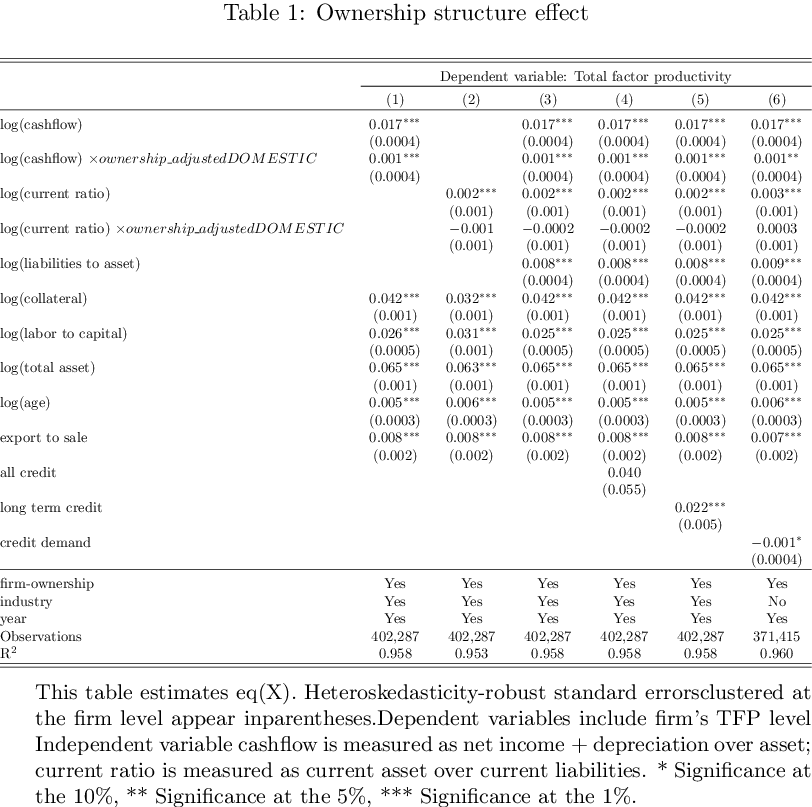

In [43]:
tbe1  = "This table estimates eq(X). " \
"Heteroskedasticity-robust standard errors" \
"clustered at the firm level appear inparentheses."\
"Dependent variables include firm's TFP level " \
" Independent variable cashflow is measured as net income + depreciation over asset;"\
" current ratio is measured as current asset over current liabilities. " \
"\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\%."

#multicolumn ={
#    'Eligible': 2,
#    'Non-Eligible': 1,
#    'All': 1,
#    'All benchmark': 1,
#}

reorder = {
    11:1,
    12:3,
    #13:5
}

#multi_lines_dep = '(city/product/trade regime/year)'
#new_r = ['& test1', 'test2']
lb.beautify(table_number = table_nb,
            reorder_var = reorder,
            #multi_lines_dep = multi_lines_dep,
            #new_row= new_r,
            #multicolumn = multicolumn,
            table_nte = tbe1,
            jupyter_preview = True,
            resolution = 170,
            folder = folder)

In [44]:
folder = 'Tables_0'
table_nb = 1
table = 'table_{}'.format(table_nb)
path = os.path.join(folder, table + '.txt')
if os.path.exists(folder) == False:
        os.mkdir(folder)
for ext in ['.txt', '.tex', '.pdf']:
    x = [a for a in os.listdir(folder) if a.endswith(ext)]
    [os.remove(os.path.join(folder, i)) for i in x]

In [45]:
%get path table 
### More control
t_1 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible) + 
            log(current_ratio) + 
            log(liabilities_tot_asset) + 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale +
            supply_all_credit
            | firm + year + indu_2|0 | firm, df_final%>% filter(ownership_adjusted == 'DOMESTIC'),
            exactDOF = TRUE)
t_2 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible) + 
            log(current_ratio) + 
            log(liabilities_tot_asset) + 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale +
            supply_long_term_credit 
            | firm + year + indu_2|0 | firm, df_final%>% filter(ownership_adjusted == 'DOMESTIC'),
            exactDOF = TRUE)
t_3 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible) + 
            log(current_ratio) + 
            log(liabilities_tot_asset) + 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale +
            credit_constraint
            | firm + year|0 | firm, df_final%>% filter(ownership_adjusted == 'DOMESTIC'),
            exactDOF = TRUE)

### PRivate
### More control
t_4 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible) + 
            log(current_ratio) + 
            log(liabilities_tot_asset) + 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale +
            supply_all_credit
            | firm + year + indu_2|0 | firm, df_final%>% filter(ownership_adjusted == 'FOREIGN'),
            exactDOF = TRUE)
t_5 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible) + 
            log(current_ratio) + 
            log(liabilities_tot_asset) + 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale +
            supply_long_term_credit 
            | firm + year + indu_2|0 | firm, df_final%>% filter(ownership_adjusted == 'FOREIGN'),
            exactDOF = TRUE)
t_6 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible) + 
            log(current_ratio) + 
            log(liabilities_tot_asset) + 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale +
            credit_constraint
            | firm + year|0 | firm, df_final%>% filter(ownership_adjusted == 'FOREIGN'),
            exactDOF = TRUE)


dep <- "Dependent variable: Total factor productivity"
fe1 <- list(
    c("firm",  "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
    c("industry",  "Yes", "Yes", "No", "Yes", "Yes", "No"),
    c("year",  "Yes", "Yes", "Yes", "Yes", "Yes", "Yes")
             )

table_1 <- go_latex(list(
    t_1, t_2, t_3, t_4,t_5, t_6
),
    title="Ownership structure effect",
    dep_var = dep,
    addFE=fe1,
    save=TRUE,
    note = FALSE,
    name=path
) 

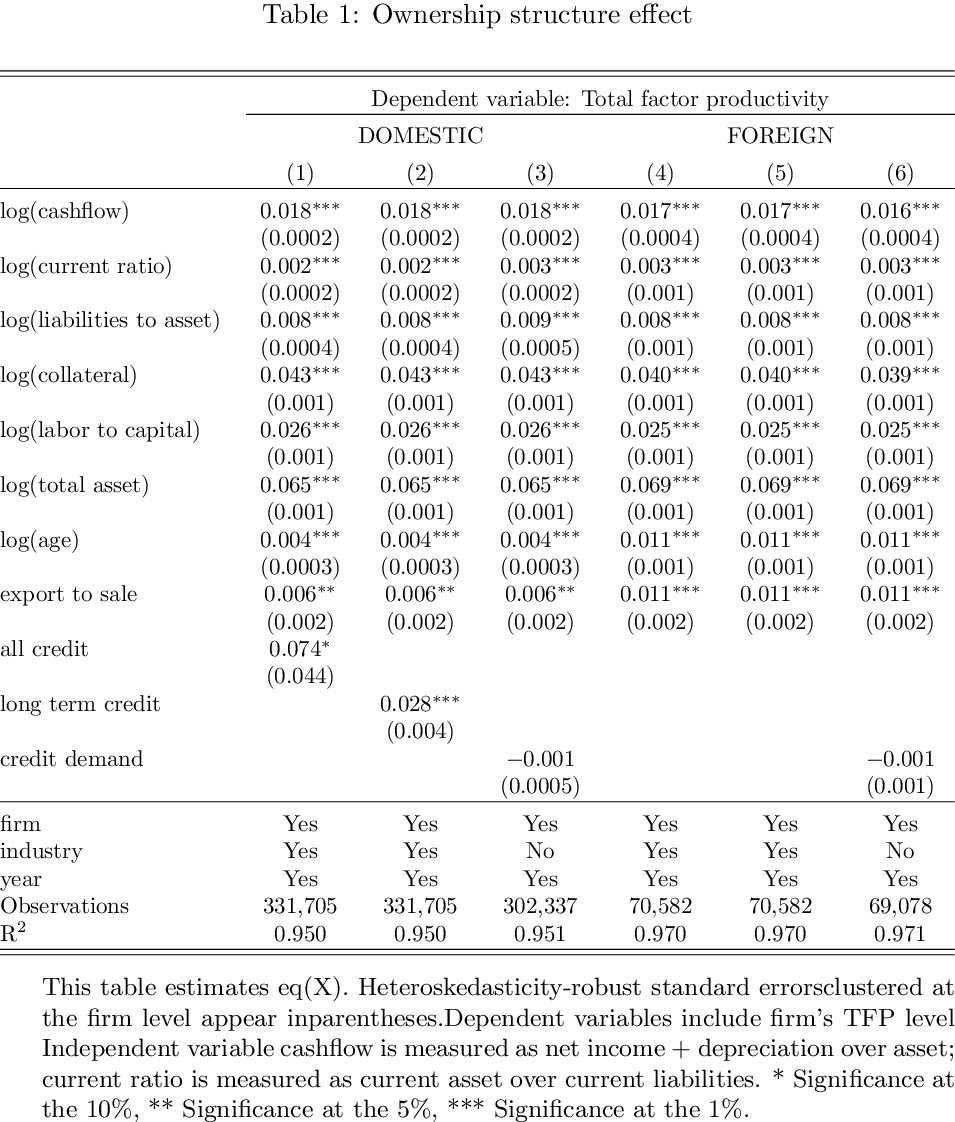

In [47]:
tbe1  = "This table estimates eq(X). " \
"Heteroskedasticity-robust standard errors" \
"clustered at the firm level appear inparentheses."\
"Dependent variables include firm's TFP level " \
" Independent variable cashflow is measured as net income + depreciation over asset;"\
" current ratio is measured as current asset over current liabilities. " \
"\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\%."

multicolumn ={
    'DOMESTIC': 3,
    'FOREIGN': 3,
}

#multi_lines_dep = '(city/product/trade regime/year)'
#new_r = ['& test1', 'test2']
lb.beautify(table_number = table_nb,
            #reorder_var = reorder,
            #multi_lines_dep = multi_lines_dep,
            #new_row= new_r,
            multicolumn = multicolumn,
            table_nte = tbe1,
            jupyter_preview = True,
            resolution = 200,
            folder = folder)

## Table 3: city characteristic structure effect

### TCZ

### Subset

In [ ]:
folder = 'Tables_0'
table_nb = 1
table = 'table_{}'.format(table_nb)
path = os.path.join(folder, table + '.txt')
if os.path.exists(folder) == False:
        os.mkdir(folder)
for ext in ['.txt', '.tex', '.pdf']:
    x = [a for a in os.listdir(folder) if a.endswith(ext)]
    [os.remove(os.path.join(folder, i)) for i in x]

In [ ]:
%get path table
t_0 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible) + 
            log(current_ratio) + 
            log(liabilities_tot_asset) + 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale 
            | firm + year + indu_2|0 | firm, df_final %>% filter(tcz == 1),
            exactDOF = TRUE)
t_1 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible) + 
            log(current_ratio) + 
            log(liabilities_tot_asset) + 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale 
            | firm + year + indu_2|0 | firm, df_final %>% filter(tcz == 0),
            exactDOF = TRUE)

dep <- "Dependent variable: Total factor productivity"
fe1 <- list(
    c("firm", "Yes", "Yes", "Yes", "Yes"),
    c("industry", "Yes", "Yes", "Yes", "Yes"),
    c("year", "Yes", "Yes", "Yes", "Yes")
             )

table_1 <- go_latex(list(
    t_0,t_1
),
    title="PH Strong version",
    dep_var = dep,
    addFE=fe1,
    save=TRUE,
    note = FALSE,
    name=path
) 

In [ ]:
tbe1  = "This table estimates eq(X). " \
"Heteroskedasticity-robust standard errors" \
"clustered at the firm level appear inparentheses."\
"Dependent variables include firm's TFP level " \
" Independent variable cashflow is measured as net income + depreciation over asset;"\
" current ratio is measured as current asset over current liabilities. " \
"\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\%."

multicolumn ={
    'City': 2,
    'Policy mandate': 2,
#    'All': 1,
#    'All benchmark': 1,
}

#multi_lines_dep = '(city/product/trade regime/year)'
new_r = ['& TCZ', 'No TCZ', 'Above', 'Below']
lb.beautify(table_number = table_nb,
            #reorder_var = reorder,
            #multi_lines_dep = multi_lines_dep,
            #new_row= new_r,
            #multicolumn = multicolumn,
            table_nte = tbe1,
            jupyter_preview = True,
            resolution = 150,
            folder = folder)

In [ ]:
summary(felm(log(tfp_op) ~ 
            log(cashflow_to_tangible) * tcz + 
            log(current_ratio) + 
            log(liabilities_tot_asset) + 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale 
            | firm + year + indu_2|0 | firm, df_final,
            exactDOF = TRUE))

## Ownership and policy

### TCZ

In [ ]:
folder = 'Tables_0'
table_nb = 1
table = 'table_{}'.format(table_nb)
path = os.path.join(folder, table + '.txt')
if os.path.exists(folder) == False:
        os.mkdir(folder)
for ext in ['.txt', '.tex', '.pdf']:
    x = [a for a in os.listdir(folder) if a.endswith(ext)]
    [os.remove(os.path.join(folder, i)) for i in x]

In [ ]:
%get path table
### SOE
t_0 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible) + 
            log(current_ratio) + 
            log(liabilities_tot_asset) + 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale 
            | firm + year + indu_2|0 | firm, df_final %>% filter(
                soe_vs_pri == 'SOE' & tcz == 1),
            exactDOF = TRUE)
t_1 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible) + 
            log(current_ratio) + 
            log(liabilities_tot_asset) + 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale 
            | firm + year + indu_2|0 | firm, df_final %>% filter(
                soe_vs_pri == 'SOE' & tcz == 0),
            exactDOF = TRUE)

### Private
t_2 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible) + 
            log(current_ratio) + 
            log(liabilities_tot_asset) + 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale 
            | firm + year + indu_2|0 | firm, df_final %>% filter(
                soe_vs_pri == 'PRIVATE' & tcz == 1),
            exactDOF = TRUE)
t_3 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible) + 
            log(current_ratio) + 
            log(liabilities_tot_asset) + 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale 
            | firm + year + indu_2|0 | firm, df_final %>% filter(
                soe_vs_pri == 'PRIVATE' & tcz == 0),
            exactDOF = TRUE)
dep <- "Dependent variable: Total factor productivity"
fe1 <- list(
    c("firm", "Yes", "Yes", "Yes", "Yes"),
    c("industry", "Yes", "Yes", "Yes", "Yes"),
    c("year", "Yes", "Yes", "Yes", "Yes")
             )

table_1 <- go_latex(list(
    t_0,t_1,t_2, t_3
),
    title="PH Strong version",
    dep_var = dep,
    addFE=fe1,
    save=TRUE,
    note = FALSE,
    name=path
) 

In [ ]:
tbe1  = "This table estimates eq(X). " \
"Heteroskedasticity-robust standard errors" \
"clustered at the firm level appear inparentheses."\
"Dependent variables include firm's TFP level " \
" Independent variable cashflow is measured as net income + depreciation over asset;"\
" current ratio is measured as current asset over current liabilities. " \
"\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\%."

multicolumn ={
    'SOE': 2,
    'Private': 2
}

#multi_lines_dep = '(city/product/trade regime/year)'
new_r = ['& TCZ', 'No TCZ', 'TCZ','No TCZ']
lb.beautify(table_number = table_nb,
            #reorder_var = reorder,
            #multi_lines_dep = multi_lines_dep,
            new_row= new_r,
            multicolumn = multicolumn,
            table_nte = tbe1,
            jupyter_preview = True,
            resolution = 150,
            folder = folder)

### Policy mandate

In [ ]:
folder = 'Tables_0'
table_nb = 1
table = 'table_{}'.format(table_nb)
path = os.path.join(folder, table + '.txt')
if os.path.exists(folder) == False:
        os.mkdir(folder)
for ext in ['.txt', '.tex', '.pdf']:
    x = [a for a in os.listdir(folder) if a.endswith(ext)]
    [os.remove(os.path.join(folder, i)) for i in x]

In [ ]:
%get path table
### SOE
t_0 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible) + 
            log(current_ratio) + 
            log(liabilities_tot_asset) + 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale 
            | firm + year + indu_2|0 | firm, df_final %>% filter(
                soe_vs_pri == 'SOE' & tso2_mandate_c >= 0.061568804 & 
                year %in% list("2006", "2007")),
            exactDOF = TRUE)
t_1 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible) + 
            log(current_ratio) + 
            log(liabilities_tot_asset) + 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale 
            | firm + year + indu_2|0 | firm, df_final %>% filter(
                soe_vs_pri == 'SOE' & tso2_mandate_c < 0.061568804 & 
                year %in% list("2006", "2007")),
            exactDOF = TRUE)

### Private
t_2 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible) + 
            log(current_ratio) + 
            log(liabilities_tot_asset) + 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale 
            | firm + year + indu_2|0 | firm, df_final %>% filter(
                soe_vs_pri == 'PRIVATE' & tso2_mandate_c >= 0.061568804 & 
                year %in% list("2006", "2007")),
            exactDOF = TRUE)
t_3 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible) + 
            log(current_ratio) + 
            log(liabilities_tot_asset) + 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale 
            | firm + year + indu_2|0 | firm, df_final %>% filter(
                soe_vs_pri == 'PRIVATE' & tso2_mandate_c < 0.061568804 & 
                year %in% list("2006", "2007")),
            exactDOF = TRUE)
dep <- "Dependent variable: Total factor productivity"
fe1 <- list(
    c("firm", "Yes", "Yes", "Yes", "Yes"),
    c("industry", "Yes", "Yes", "Yes", "Yes"),
    c("year", "Yes", "Yes", "Yes", "Yes")
             )

table_1 <- go_latex(list(
    t_0,t_1,t_2, t_3
),
    title="PH Strong version",
    dep_var = dep,
    addFE=fe1,
    save=TRUE,
    note = FALSE,
    name=path
) 

In [ ]:
tbe1  = "This table estimates eq(X). " \
"Heteroskedasticity-robust standard errors" \
"clustered at the firm level appear inparentheses."\
"Dependent variables include firm's TFP level " \
" Independent variable cashflow is measured as net income + depreciation over asset;"\
" current ratio is measured as current asset over current liabilities. " \
"\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\%."

multicolumn ={
    'SOE': 2,
    'Private': 2
}

#multi_lines_dep = '(city/product/trade regime/year)'
new_r = ['& Above', 'Below', 'Above','Below']
lb.beautify(table_number = table_nb,
            #reorder_var = reorder,
            #multi_lines_dep = multi_lines_dep,
            new_row= new_r,
            multicolumn = multicolumn,
            table_nte = tbe1,
            jupyter_preview = True,
            resolution = 150,
            folder = folder)

### Interaction

In [ ]:
folder = 'Tables_0'
table_nb = 1
table = 'table_{}'.format(table_nb)
path = os.path.join(folder, table + '.txt')
if os.path.exists(folder) == False:
        os.mkdir(folder)
for ext in ['.txt', '.tex', '.pdf']:
    x = [a for a in os.listdir(folder) if a.endswith(ext)]
    [os.remove(os.path.join(folder, i)) for i in x]

In [ ]:
%get path table 
t_0 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible) * tcz+ 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale 
            | firm + year + indu_2|0 | firm, df_final,
            exactDOF = TRUE)
t_1 <- felm(log(tfp_op) ~ 
            log(current_ratio) * tcz+ 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale 
            | firm + year + indu_2|0 | firm, df_final,
            exactDOF = TRUE)
t_2 <- felm(log(tfp_op) ~ 
            log(liabilities_tot_asset)* tcz + 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale 
            | firm + year + indu_2|0 | firm, df_final,
            exactDOF = TRUE)
###
t_3 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible) * tcz+ 
            log(current_ratio) * tcz+ 
            log(liabilities_tot_asset) * tcz+ 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale 
            | firm + year + indu_2|0 | firm, df_final,
            exactDOF = TRUE)
t_3 <- change_target(t_3)
### More control
t_4 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible) * tcz+ 
            log(current_ratio) * tcz+ 
            log(liabilities_tot_asset) * tcz+ 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale +
            supply_all_credit
            | firm + year + indu_2|0 | firm, df_final,
            exactDOF = TRUE)
t_4 <- change_target(t_4)
t_5 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible)* tcz + 
            log(current_ratio) * tcz+ 
            log(liabilities_tot_asset) * tcz+ 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale +
            supply_long_term_credit 
            | firm + year + indu_2|0 | firm, df_final,
            exactDOF = TRUE)
t_5 <- change_target(t_5)
t_6 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible) * tcz+ 
            log(current_ratio) * tcz+ 
            log(liabilities_tot_asset) * tcz+ 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale +
            credit_constraint
            | firm + year|0 | firm, df_final,
            exactDOF = TRUE)
t_6 <- change_target(t_6)

dep <- "Dependent variable: Total factor productivity"
fe1 <- list(
    c("firm", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
    c("industry", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "No"),
    c("year", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes")
             )

table_1 <- go_latex(list(
    t_0, t_1, t_2, t_3, t_4,t_5, t_6
),
    title="City characteristics TCZ",
    dep_var = dep,
    addFE=fe1,
    save=TRUE,
    note = FALSE,
    name=path
) 

In [ ]:
tbe1  = "This table estimates eq(X). " \
"Heteroskedasticity-robust standard errors" \
"clustered at the firm level appear inparentheses."\
"Dependent variables include firm's TFP level " \
" Independent variable cashflow is measured as net income + depreciation over asset;"\
" current ratio is measured as current asset over current liabilities. " \
"\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\%."

#multicolumn ={
#    'Eligible': 2,
#    'Non-Eligible': 1,
#    'All': 1,
#    'All benchmark': 1,
#}

reorder = {
    12:3,
    13:4,
    14:5
}

#multi_lines_dep = '(city/product/trade regime/year)'
#new_r = ['& test1', 'test2']
lb.beautify(table_number = table_nb,
            reorder_var = reorder,
            #multi_lines_dep = multi_lines_dep,
            #new_row= new_r,
            #multicolumn = multicolumn,
            table_nte = tbe1,
            jupyter_preview = True,
            resolution = 150,
            folder = folder)

### SPZ

In [ ]:
folder = 'Tables_0'
table_nb = 1
table = 'table_{}'.format(table_nb)
path = os.path.join(folder, table + '.txt')
if os.path.exists(folder) == False:
        os.mkdir(folder)
for ext in ['.txt', '.tex', '.pdf']:
    x = [a for a in os.listdir(folder) if a.endswith(ext)]
    [os.remove(os.path.join(folder, i)) for i in x]

In [ ]:
%get path table 
t_0 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible) * spz+ 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale 
            | firm + year + indu_2|0 | firm, df_final,
            exactDOF = TRUE)
t_1 <- felm(log(tfp_op) ~ 
            log(current_ratio) * spz+ 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale 
            | firm + year + indu_2|0 | firm, df_final,
            exactDOF = TRUE)
t_2 <- felm(log(tfp_op) ~ 
            log(liabilities_tot_asset)* spz + 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale 
            | firm + year + indu_2|0 | firm, df_final,
            exactDOF = TRUE)
###
t_3 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible) * spz+ 
            log(current_ratio) * spz+ 
            log(liabilities_tot_asset) * spz+ 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale 
            | firm + year + indu_2|0 | firm, df_final,
            exactDOF = TRUE)
t_3 <- change_target(t_3)
### More control
t_4 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible) * spz+ 
            log(current_ratio) * spz+ 
            log(liabilities_tot_asset) * spz+ 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale +
            supply_all_credit
            | firm + year + indu_2|0 | firm, df_final,
            exactDOF = TRUE)
t_4 <- change_target(t_4)
t_5 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible)* spz + 
            log(current_ratio) * spz+ 
            log(liabilities_tot_asset) * spz+ 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale +
            supply_long_term_credit 
            | firm + year + indu_2|0 | firm, df_final,
            exactDOF = TRUE)
t_5 <- change_target(t_5)
t_6 <- felm(log(tfp_op) ~ 
            log(cashflow_to_tangible) * spz+ 
            log(current_ratio) * spz+ 
            log(liabilities_tot_asset) * spz+ 
            log(asset_tangibility_tot_asset) +
            log(labor_capital) +
            log(total_asset) + 
            log(age) +
            export_to_sale +
            credit_constraint
            | firm + year|0 | firm, df_final,
            exactDOF = TRUE)
t_6 <- change_target(t_6)
dep <- "Dependent variable: Total factor productivity"
fe1 <- list(
    c("firm", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
    c("industry", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "No"),
    c("year", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes")
             )

table_1 <- go_latex(list(
    t_0, t_1, t_2, t_3, t_4,t_5, t_6
),
    title="City characteristics SPZ",
    dep_var = dep,
    addFE=fe1,
    save=TRUE,
    note = FALSE,
    name=path
) 

In [ ]:
tbe1  = "This table estimates eq(X). " \
"Heteroskedasticity-robust standard errors" \
"clustered at the firm level appear inparentheses."\
"Dependent variables include firm's TFP level " \
" Independent variable cashflow is measured as net income + depreciation over asset;"\
" current ratio is measured as current asset over current liabilities. " \
"\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\%."

#multicolumn ={
#    'Eligible': 2,
#    'Non-Eligible': 1,
#    'All': 1,
#    'All benchmark': 1,
#}

reorder = {
    12:3,
    13:4,
    14:5
}

#multi_lines_dep = '(city/product/trade regime/year)'
#new_r = ['& test1', 'test2']
lb.beautify(table_number = table_nb,
            reorder_var = reorder,
            #multi_lines_dep = multi_lines_dep,
            #new_row= new_r,
            #multicolumn = multicolumn,
            table_nte = tbe1,
            jupyter_preview = True,
            resolution = 150,
            folder = folder)

In [ ]:
folder = 'Tables_0'
table_nb = 1
table = 'table_{}'.format(table_nb)
path = os.path.join(folder, table + '.txt')
if os.path.exists(folder) == False:
        os.mkdir(folder)
for ext in ['.txt', '.tex', '.pdf']:
    x = [a for a in os.listdir(folder) if a.endswith(ext)]
    [os.remove(os.path.join(folder, i)) for i in x]

# Generate reports

In [ ]:
import os, time, shutil, urllib, ipykernel, json
from pathlib import Path
from notebook import notebookapp

In [ ]:
def create_report(extension = "html", keep_code = False, notebookname = None):
    """
    Create a report from the current notebook and save it in the 
    Report folder (Parent-> child directory)
    
    1. Exctract the current notbook name
    2. Convert the Notebook 
    3. Move the newly created report
    
    Args:
    extension: string. Can be "html", "pdf", "md"
    
    
    """
    
    ### Get notebook name
    connection_file = os.path.basename(ipykernel.get_connection_file())
    kernel_id = connection_file.split('-', 1)[0].split('.')[0]

    for srv in notebookapp.list_running_servers():
        try:
            if srv['token']=='' and not srv['password']:  
                req = urllib.request.urlopen(srv['url']+'api/sessions')
            else:
                req = urllib.request.urlopen(srv['url']+ \
                                             'api/sessions?token=' + \
                                             srv['token'])
            sessions = json.load(req)
            notebookname = sessions[0]['name']
        except:
            notebookname = notebookname  
    
    sep = '.'
    path = os.getcwd()
    #parent_path = str(Path(path).parent)
    
    ### Path report
    #path_report = "{}/Reports".format(parent_path)
    #path_report = "{}/Reports".format(path)
    
    ### Path destination
    name_no_extension = notebookname.split(sep, 1)[0]
    source_to_move = name_no_extension +'.{}'.format(extension)
    dest = os.path.join(path,'Reports', source_to_move)
    
    ### Generate notebook
    if keep_code:
        os.system('jupyter nbconvert --to {} {}'.format(
    extension,notebookname))
    else:
        os.system('jupyter nbconvert --no-input --to {} {}'.format(
    extension,notebookname))
    
    ### Move notebook to report folder
    #time.sleep(5)
    shutil.move(source_to_move, dest)
    print("Report Available at this adress:\n {}".format(dest))

In [ ]:
create_report(extension = "html", keep_code = False, notebookname = "05_tfp_firm_level.ipynb")